<a href="https://colab.research.google.com/github/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/blob/master/clusterizacao_kmean_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
train = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


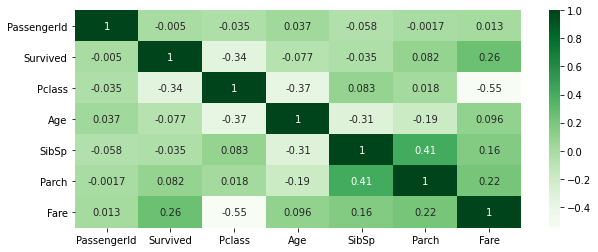

In [101]:
plt.figure(figsize=(10,4))
sns.heatmap(train.corr(), annot=True, cmap='Greens')

In [0]:
train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [103]:
print('antes \n', train.isnull().sum())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

train_numerico = train.drop(['Sex','Embarked'], axis=1)
test_numerico = test.drop(['Sex','Embarked'], axis=1)

imputer.fit(train_numerico)
train_no_null = imputer.transform(train_numerico)

imputer.fit(test_numerico)
test_no_null = imputer.transform(test_numerico)

train_tr = pd.DataFrame(train_no_null, columns=train_numerico.columns)
test_tr = pd.DataFrame(test_no_null, columns=test_numerico.columns)

print('\n depois \n', train.isnull().sum())

print(train_tr.head())

antes 
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

 depois 
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
   Survived  Pclass   Age  SibSp  Parch     Fare
0       0.0     3.0  22.0    1.0    0.0   7.2500
1       1.0     1.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  35.0    1.0    0.0  53.1000
4       0.0     3.0  35.0    0.0    0.0   8.0500


In [104]:
train_cat = train[['Sex', 'Embarked']]
test_cat = test[['Sex', 'Embarked']]

train_cat_encoded = pd.get_dummies(train_cat)
test_cat_encoded = pd.get_dummies(test_cat)

train_cat_encoded.head()

train = train_tr.join(train_cat_encoded)
train = test_tr.join(test_cat_encoded)
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,34.5,0.0,0.0,7.8292,0,1,0,1,0
1,893.0,3.0,47.0,1.0,0.0,7.0000,1,0,0,0,1
2,894.0,2.0,62.0,0.0,0.0,9.6875,0,1,0,1,0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0,1,0,0,1
4,896.0,3.0,22.0,1.0,1.0,12.2875,1,0,0,0,1


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

model = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
model.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    print("\n Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(train.iloc[ind].tolist())#('   %s' % terms[ind]),
    print

Top terms per cluster:

 Cluster 0:
[892.0, 3.0, 34.5, 0.0, 0.0, 7.8292, 0.0, 1.0, 0.0, 1.0, 0.0]
[894.0, 2.0, 62.0, 0.0, 0.0, 9.6875, 0.0, 1.0, 0.0, 1.0, 0.0]
[897.0, 3.0, 14.0, 0.0, 0.0, 9.225, 0.0, 1.0, 0.0, 0.0, 1.0]
[893.0, 3.0, 47.0, 1.0, 0.0, 7.0, 1.0, 0.0, 0.0, 0.0, 1.0]
[899.0, 2.0, 26.0, 1.0, 1.0, 29.0, 0.0, 1.0, 0.0, 0.0, 1.0]
[902.0, 3.0, 27.0, 0.0, 0.0, 7.8958, 0.0, 1.0, 0.0, 0.0, 1.0]
[895.0, 3.0, 27.0, 0.0, 0.0, 8.6625, 0.0, 1.0, 0.0, 0.0, 1.0]
[898.0, 3.0, 30.0, 0.0, 0.0, 7.6292, 1.0, 0.0, 0.0, 1.0, 0.0]
[896.0, 3.0, 22.0, 1.0, 1.0, 12.2875, 1.0, 0.0, 0.0, 0.0, 1.0]
[900.0, 3.0, 18.0, 0.0, 0.0, 7.2292, 1.0, 0.0, 1.0, 0.0, 0.0]

 Cluster 1:
[892.0, 3.0, 34.5, 0.0, 0.0, 7.8292, 0.0, 1.0, 0.0, 1.0, 0.0]
[894.0, 2.0, 62.0, 0.0, 0.0, 9.6875, 0.0, 1.0, 0.0, 1.0, 0.0]
[897.0, 3.0, 14.0, 0.0, 0.0, 9.225, 0.0, 1.0, 0.0, 0.0, 1.0]
[893.0, 3.0, 47.0, 1.0, 0.0, 7.0, 1.0, 0.0, 0.0, 0.0, 1.0]
[899.0, 2.0, 26.0, 1.0, 1.0, 29.0, 0.0, 1.0, 0.0, 0.0, 1.0]
[902.0, 3.0, 27.0, 0.0, 0.0, 7.8

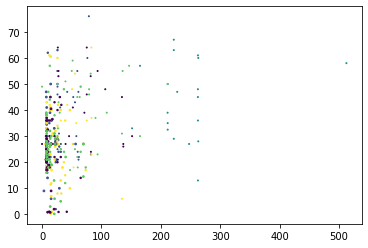

In [115]:
import numpy as np
z = plt.scatter(train.Fare, train.Age, train.Pclass, c = model.labels_)

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [122]:
print(train.head())
train_simples = train.drop(['PassengerId', 'Embarked_C',  'Embarked_Q' , 'Embarked_S', 'Sex_female' , 'Sex_male', 'SibSp' , 'Parch', 'Pclass'], axis=1)
print(train_simples.head())

   PassengerId  Pclass   Age  ...  Embarked_C  Embarked_Q  Embarked_S
0        892.0     3.0  34.5  ...           0           1           0
1        893.0     3.0  47.0  ...           0           0           1
2        894.0     2.0  62.0  ...           0           1           0
3        895.0     3.0  27.0  ...           0           0           1
4        896.0     3.0  22.0  ...           0           0           1

[5 rows x 11 columns]
    Age     Fare
0  34.5   7.8292
1  47.0   7.0000
2  62.0   9.6875
3  27.0   8.6625
4  22.0  12.2875


Top terms per cluster:

 Cluster 0:
[47.0, 7.0]
[34.5, 7.8292]

 Cluster 1:
[47.0, 7.0]
[34.5, 7.8292]

 Cluster 2:
[34.5, 7.8292]
[47.0, 7.0]


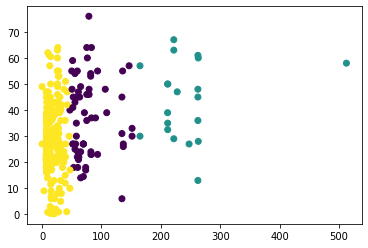

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model.fit(train_simples)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(3):
    print("\n Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(train_simples.iloc[ind].tolist())#('   %s' % terms[ind]),
    print

import numpy as np
z = plt.scatter(train_simples.Fare, train_simples.Age, c = model.labels_)